## PCA - Principal Component Analysis

PCA is an `unsupervised learning method` that is often used to reduce the dimensionality of the dataset by transforming a large dataset into a lower dimensional set that still contains most of the information of the large set.<br>
<br>
We want to find a transformation such that:

- The transformed features are `linearly independent`
- `Dimensionality can be reduced` by taking only the dimensions with the highest importance.
- Those newly found dimensions should `minimize the projection error`.
- The projected points should have maximum spread, i.e. `maximum variance`.

### Important concepts

##### **Variance**
How much spread the data has.
$$ Var(X) = \frac{1}{n}\sum(X_i - \overline{X})^2 $$

##### **Covariance**
Indicates the level to which two variables vary together.
$$ Cov(X,Y) = \frac{1}{n}\sum(X_i - \overline{X})(Y_i - \overline{Y})^T $$

##### **Eigen vectors, Eigen values**
Eigen vectors points in the direction of the maximum variance, and the corresponding eigenvalues indicate the importance of its corresponding eigenvector.
$$ \mathbb{A}\vec{v_i} = \lambda_i\vec{v_i} $$
Vectors $\vec{v_i}$ and numbers $\lambda_i$ that fullfill the equation above are called eigenvectors and eigenvalues of operator $\mathbb{A}$.

### Algorithm

- Subtract the mean from $X$ => $(X - \overline{X}).$ 
- Calculate covariance $\mathbb{C} = Cov(X,X).$
- Calculate eigenvectors and eigenvalues of the covariance matrix $\mathbb{C}\vec{v_i} = \lambda_i\vec{v_i}.$
- Sort the eigenvectors according to their eigenvalues in decreasing order.
- Choose first `k` eigenvectors and that will be the new `k` dimensions.
- Transform the original n-dimensional data points into `k` dimensions.

In [1]:
import numpy as np


class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering or mean subtraction
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # Compute the covariance matrix
        cov = np.cov(X.T)

        # Calculate the eigenvectors and eigenvalues of covariance matrix
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        # Transpose the eigenvectors
        eigenvectors = eigenvectors.T

        # Sort the eigenvectors according to the eigenvalues
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

Shape of X:  (150, 4)
Shape of projected X:  (150, 2)


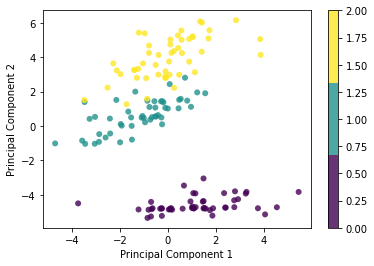

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


data = load_iris()
X = data.data
y = data.target

pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X: ", X.shape)
print("Shape of projected X: ", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolors="none", alpha=0.8, cmap=plt.get_cmap("viridis", 3))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

***We can clearly see from the above plot that we decreased the dimensionality of the dataset from `4` features to `2` features or principal components.***